<a href="https://colab.research.google.com/github/omgits0mar/Datasets/blob/master/ClassificationML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import jupyterthemes as jt
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme

import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [ ]:
# set_nb_theme('onedork')
# #monokai
# #chesterish
# #oceans16 gamed
# #onedork gamed brdo
# #solarizedl

# Code start from here :

### Importing :

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



### Reading data from csv

In [123]:
df = pd.read_csv('airline-price-classification.csv')

In [164]:
df.head()

,ch_code,num_code,stop,type,TicketCategory,month,day,dayofyear,dep_hour,dep_minute,hours_taken,minutes_taken,arr_hour,arr_minute,source,destination
0,7,812,1,0,3,5,3,123,9,45,10.0,10.0,19,55,0,3
1,7,975,1,0,3,3,18,77,5,45,6.0,30.0,12,15,2,3
2,3,7537,1,1,0,9,3,246,14,30,8.0,10.0,22,40,5,3
3,3,287,1,1,2,3,15,74,10,40,9.0,40.0,20,20,5,2
4,7,826,1,1,2,3,22,81,12,30,7.0,25.0,19,55,1,4


In [ ]:
df.shape

### Data preprocessing on 'price'

In [ ]:
lbl_enc = LabelEncoder()
df['TicketCategory'] = lbl_enc.fit_transform(df[["TicketCategory"]])
print(df['TicketCategory'])

### Data preprocessing on 'date'

In [127]:
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].dt.strftime("%m/%d/%Y")


In [ ]:
print(df[df.columns[0]])

In [ ]:
pd.DatetimeIndex(df["date"]).weekday

In [130]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['dayofyear'] = pd.DatetimeIndex(df['date']).dayofyear

In [131]:
#df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')

### Data preprocessing : 'ch_code'

In [ ]:
df['ch_code'] = lbl_enc.fit_transform(df[["ch_code"]])
print(df['ch_code'])

### Data preprocessing : 'dep_time'

In [133]:
df["dep_time"]=pd.to_datetime(df["dep_time"])
df['dep_time'] = df['dep_time'].dt.strftime("%-H:%M")

In [134]:
df["dep_hour"]=pd.DatetimeIndex(df["dep_time"]).hour
df["dep_minute"]=pd.DatetimeIndex(df["dep_time"]).minute

### Data preprocessing : 'time_taken'

In [ ]:
df["hours_taken"] = df["time_taken"].str.split('h').str.get(0)
df["minutes_taken"] = df["time_taken"].str[4:6]
df["minutes_taken"] = df["minutes_taken"].str.replace('m', '')
df["minutes_taken"] = df["minutes_taken"].str.replace('h', '')
df["hours_taken"] = pd.to_numeric(df["hours_taken"])
df["minutes_taken"] = pd.to_numeric(df["minutes_taken"], errors='coerce')
df.head()

### Data preprocessing : 'stop'

In [136]:
df["stop"] = df["stop"].str.split('-').str.get(0)
df["stop"] = df["stop"].replace(['non'], 0)
df.isna().sum() #  28944 null vals
df["stop"] = df["stop"].replace(['2+'], 2) # Indicates for 2 or more stops
df['stop'] = df['stop'].fillna(0)
df['stop'] = pd.to_numeric(df['stop'])
# print(df[9:14])

### Data preprocessing : 'arr_time'

In [ ]:
df["arr_time"]=pd.to_datetime(df["arr_time"])
df['arr_time'] = df['arr_time'].dt.strftime("%-H:%M")
df["arr_hour"]=pd.DatetimeIndex(df["arr_time"]).hour
df["arr_minute"]=pd.DatetimeIndex(df["arr_time"]).minute
df["arr_hour"] = pd.to_numeric(df["arr_hour"])
df["arr_minute"] = pd.to_numeric(df["arr_minute"])
df.head()


### Data preprocessing : 'type'

In [ ]:
df['type'] = lbl_enc.fit_transform(df[["type"]])
print(df['type'])

### Data preprocessing : 'route'

In [139]:
df['source'] = df['route'].str.split( ', ').str.get(0).str.split(':').str.get(1)
df['destination'] = df['route'].str.split( ', ').str.get(1).str.split(':').str.get(1).str.split('}').str.get(0)
df['source'] = df['source'].str.replace('\'', "")
df['destination'] = df['destination'].str.replace('\'', "")

In [ ]:
df.head()

In [ ]:
df['source'] = lbl_enc.fit_transform(df[["source"]])
print(df['source'])

In [ ]:
df['destination'] = lbl_enc.fit_transform(df[["destination"]])
print(df['destination'])
df = df.dropna()
df = df.drop(['airline', 'date', 'dep_time', "time_taken", 'arr_time', 'route',], axis=1)
#df = pd.get_dummies(df)

In [163]:
df.head()

,ch_code,num_code,stop,type,TicketCategory,month,day,dayofyear,dep_hour,dep_minute,hours_taken,minutes_taken,arr_hour,arr_minute,source,destination
0,7,812,1,0,3,5,3,123,9,45,10.0,10.0,19,55,0,3
1,7,975,1,0,3,3,18,77,5,45,6.0,30.0,12,15,2,3
2,3,7537,1,1,0,9,3,246,14,30,8.0,10.0,22,40,5,3
3,3,287,1,1,2,3,15,74,10,40,9.0,40.0,20,20,5,2
4,7,826,1,1,2,3,22,81,12,30,7.0,25.0,19,55,1,4


In [162]:
print(df.columns)

Index(['ch_code', 'num_code', 'stop', 'type', 'TicketCategory', 'month', 'day',
       'dayofyear', 'dep_hour', 'dep_minute', 'hours_taken', 'minutes_taken',
       'arr_hour', 'arr_minute', 'source', 'destination'],
      dtype='object')


In [144]:
X = df.loc[:, df.columns != 'TicketCategory']
Y = df['TicketCategory']

In [145]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=8)

In [146]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler = ss.fit(XTrain)
trainX_scaled = scaler.transform(XTrain)
testX_scaled = scaler.transform(XTest)

In [147]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [148]:
y_train = to_categorical(YTrain)
y_test = to_categorical(YTest)

In [119]:
# define model
model = Sequential()
model.add(Dense(128, input_dim=XTrain.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [120]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])              

In [ ]:
history = model.fit(XTrain, y_train, validation_data=(XTest, y_test), epochs=50, verbose=1)


In [70]:
train_acc = model.evaluate(XTrain, y_train, verbose=0)
test_acc = model.evaluate(XTest, y_test, verbose=0)

In [ ]:
model.summary()
print(train_acc)
print(test_acc)

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha = 0.1)
ridge.fit(trainX_scaled, YTrain)

rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
rfc.fit(trainX_scaled, YTrain)

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 50,activation = 'tanh',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, YTrain)

dtree = DecisionTreeClassifier(max_depth=50, random_state=42)
dtree.fit(trainX_scaled, YTrain)

knn = KNeighborsClassifier()
knn.fit(trainX_scaled, YTrain) 

logestic = LogisticRegression(C=0.1, penalty = 'l2', solver = 'lbfgs')
logestic.fit(trainX_scaled, YTrain) 

# rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=1).fit(trainX_scaled, YTrain)
# poly_svc = svm.SVC(kernel='poly',degree = 3, C=1).fit(trainX_scaled, YTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.1)

In [159]:
for i, clf in enumerate((ridge, rfc, mlp_clf, dtree, knn, logestic)):
    predictions = clf.predict(testX_scaled)
    print("Accuracy of: " + str(clf)+":"+str(accuracy_score(YTest, predictions)))
    print('\n')
    print(classification_report(YTest, predictions))

Accuracy of: RidgeClassifier(alpha=0.1):0.7104824944839931




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.74      0.54      0.62     13035
           1       0.00      0.00      0.00      4498
           2       0.74      0.84      0.79     20833
           3       0.64      1.00      0.78      9676

    accuracy                           0.71     48042
   macro avg       0.53      0.59      0.55     48042
weighted avg       0.65      0.71      0.67     48042

Accuracy of: RandomForestClassifier(n_jobs=-1, random_state=42):0.9608259439656966


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     13035
           1       0.95      0.96      0.95      4498
           2       0.97      0.96      0.96     20833
           3       0.99      0.98      0.98      9676

    accuracy                           0.96     48042
   macro avg       0.96      0.96      0.96     48042
weighted avg       0.96      0.96      0.96     48042

Accuracy of: MLPClassifier(activation='tanh',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


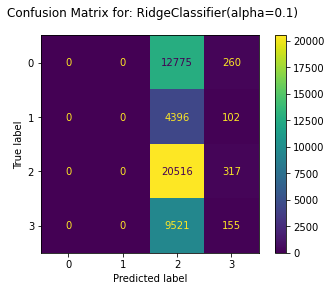

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


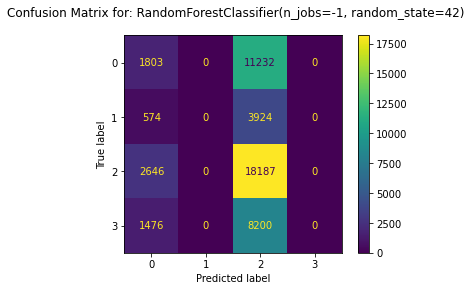

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


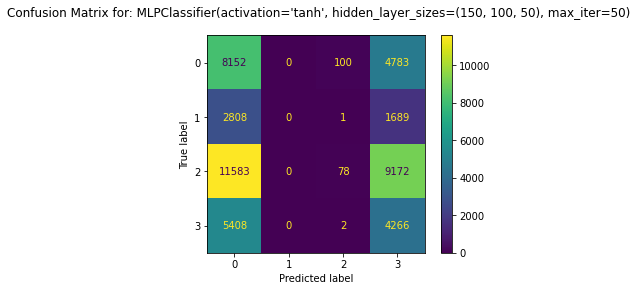

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


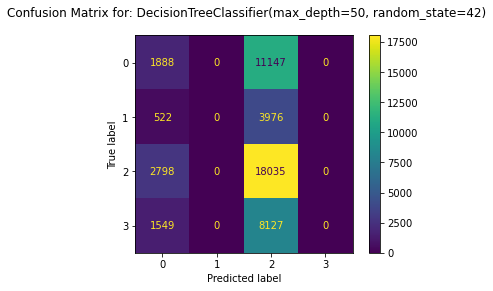

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


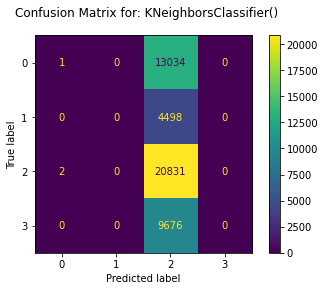

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


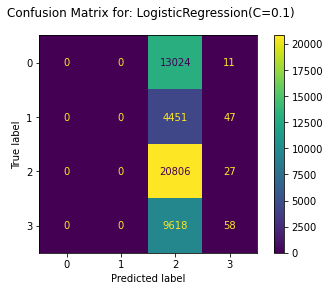

In [161]:
from sklearn.metrics import plot_confusion_matrix

for i, clf in enumerate((ridge, rfc, mlp_clf, dtree, knn, logestic)):
    fig = plot_confusion_matrix(clf, XTest, YTest, display_labels=clf.classes_)
    fig.figure_.suptitle("Confusion Matrix for: " + str(clf))
    plt.show()

In [165]:
import joblib
filename = '_classification_model.sav'
joblib.dump(model, filename)
for i, clf in enumerate((ridge, rfc, mlp_clf, dtree, knn, logestic)):
    joblib.dump(model, str(clf)+filename)

INFO:tensorflow:Assets written to: ram://99a27908-1b45-4a7e-a11e-e8af0eef9e86/assets
INFO:tensorflow:Assets written to: ram://83ddc6dc-ee65-4528-a46d-e7e52ee72c35/assets
INFO:tensorflow:Assets written to: ram://a90e1263-3bfb-4f50-9499-983fefd0c4a3/assets
INFO:tensorflow:Assets written to: ram://d4bd47cf-67ee-49cd-a11d-6f869183a092/assets
INFO:tensorflow:Assets written to: ram://cfd00da3-9b41-467c-b89c-c3e888484f50/assets
INFO:tensorflow:Assets written to: ram://cc07d555-c3c1-4d38-9993-3e5a0f042a15/assets
INFO:tensorflow:Assets written to: ram://a6a08cfc-dcc2-4bd6-82e4-c62d67fc70c6/assets


In [ ]:
# # some time later...

# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)

## Scaling Applied :

### Accuracy of: MLPClassifier():0.8862869988759835
### Accuracy of: MLPClassifier(activation='relu', hidden_layer_sizes=(150, 100, 50), max_iter=50, solver='lbfgs'):0.7662670163606844
### Accuracy of: MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50), max_iter=50,solver='sgd'):0.8349777278214895
### Accuracy of: MLPClassifier(activation='relu', hidden_layer_sizes=(150, 100, 50), max_iter=50,solver='adam'):0.9352233462387078
### Accuracy of: MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50), max_iter=50,solver='adam'):0.9402397901835894
### Accuracy of: MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),max_iter=100,solver='adam'):0.9444444444444444 (take > 10 mins) 

### Accuracy of: LogisticRegression(multi_class='multinomial', max_iter=100)  :0.7278423046500978
### Accuracy of: LogisticRegression(multi_class='multinomial', max_iter=50)   :0.715186711627326
### Accuracy of: LogisticRegression(C=0.01, solver='liblinear'):               0.689480038299821
### Accuracy of: LogisticRegression(C=0.1, solver='lbfgs'):0.7187044669247742

### Accuracy of: RidgeClassifier(alpha=0.1):0.7104824944839931


### Accuracy of: KNeighborsClassifier():0.8935098455518088

###Accuracy of: DecisionTreeClassifier(random_state=42):                       0.959056658756921
### Accuracy of: DecisionTreeClassifier(max_depth=20, random_state=42):        0.9547895591357562
### Accuracy of: DecisionTreeClassifier(max_depth=50, random_state=42):        0.959056658756921

### Accuracy of: RandomForestClassifier(n_jobs=-1, random_state=42):           0.9608259439656966-->BEST



# Conclusion :
  
# BIG NOTE :
  ### all this data gathered on GoogleCollab and it may slightly differs in jupyter or pycharm

 